In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
#Loading data
bookings_data = pd.read_csv("hotel_bookings.csv")
bookings_data
print(len(bookings_data))

21066


In [4]:
#Dividing data for different hotels
resort_hotel = bookings_data[bookings_data.hotel == 'Resort Hotel']
print(len(resort_hotel))

7227


In [5]:
city_hotel = bookings_data[bookings_data.hotel == 'City Hotel']
print(len(city_hotel))

13839


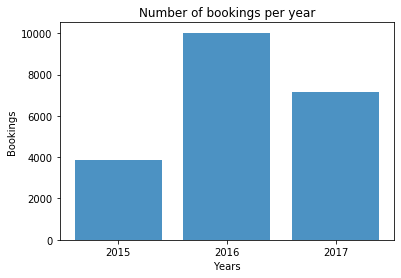

In [6]:
#Number of Bookings per year. Assuming we have data for all the months of all three years, we can say that 2016 is the 
#year with most bookings. 

from collections import Counter
years_booking_frequency = Counter(bookings_data['arrival_date_year'])
plt.bar(years_booking_frequency.keys(), years_booking_frequency.values(), align='center', alpha=0.8)
plt.xticks(fontsize=10)
plt.title("Number of bookings per year")
plt.xlabel("Years")
plt.ylabel("Bookings")
plt.locator_params(axis='x', nbins=3)

(500, 2500)

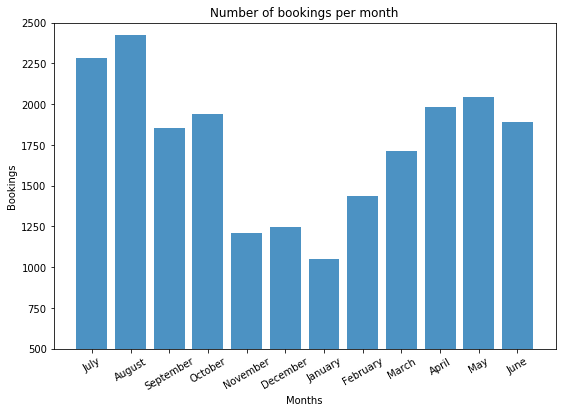

In [12]:
#Number of bookings per month
months_booking_frequency = Counter(bookings_data['arrival_date_month'])
plt.subplots(figsize=(9,6))
plt.bar(months_booking_frequency.keys(), months_booking_frequency.values(), align='center', alpha=0.8)
plt.xticks(fontsize=10, rotation=30)
plt.title("Number of bookings per month")
plt.xlabel("Months")
plt.ylabel("Bookings")
plt.ylim(500,2500)

{35.7869539198085, 37.79264214046823, 38.794911226059}


(array([2014., 2015., 2016., 2017., 2018.]),
 <a list of 5 Text xticklabel objects>)

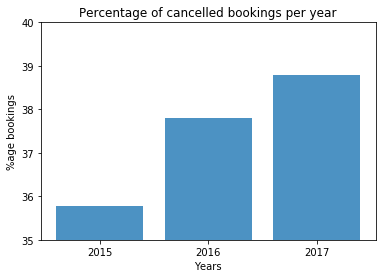

In [8]:
#Cancelled bookings
cancelled_bookings = bookings_data[bookings_data.is_canceled == 1]

#percentage of cancelled bookings per year
cancelled_bookings_per_year = Counter(cancelled_bookings['arrival_date_year'])
percentage_cancelled_per_year = {(cancelled_bookings_per_year[2015]/years_booking_frequency[2015])*100, (cancelled_bookings_per_year[2016]/years_booking_frequency[2016])*100, (cancelled_bookings_per_year[2017]/years_booking_frequency[2017])*100}
print(percentage_cancelled_per_year)

plt.locator_params(axis='x', nbins=3)
plt.ylim(35,40)
plt.title("Percentage of cancelled bookings per year")
plt.xlabel("Years")
plt.ylabel("%age bookings")
plt.bar(years_booking_frequency.keys(), percentage_cancelled_per_year, align='center', alpha=0.8)
plt.xticks(fontsize=10)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

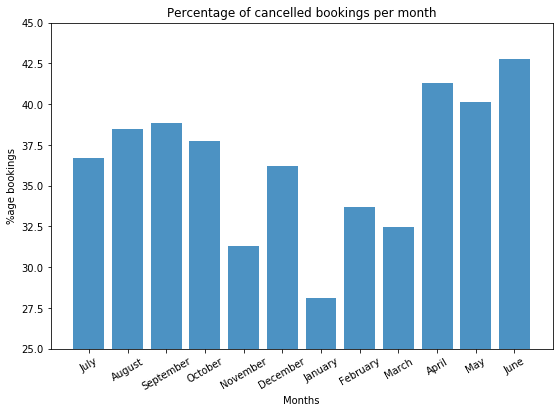

In [13]:
#cancelled bookings per month
cancelled_bookings_per_month = Counter(cancelled_bookings['arrival_date_month'])
percentage_cancelled_per_month = []

for key in cancelled_bookings_per_month:
    percentage_cancelled_per_month.append(cancelled_bookings_per_month[key]/months_booking_frequency[key]*100)

plt.subplots(figsize=(9,6))
plt.ylim(25,45)
plt.title("Percentage of cancelled bookings per month")
plt.xlabel("Months")
plt.ylabel("%age bookings")
plt.bar(months_booking_frequency.keys(), percentage_cancelled_per_month, align='center', alpha=0.8)
plt.xticks(fontsize=10, rotation=30)

                                  column          score
3   days_betwee_reservation_and_check_in  198982.825248
17                previous_cancellations    2671.512693
20                    assigned_room_type    1732.947758
23             total_of_special_requests    1208.565158
18        previous_bookings_not_canceled     973.448046
21                       booking_changes     777.455423
22           required_car_parking_spaces     772.310715
19                    reserved_room_type     231.291177
1                                  hotel     218.198288
15                  distribution_channel     173.393030


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

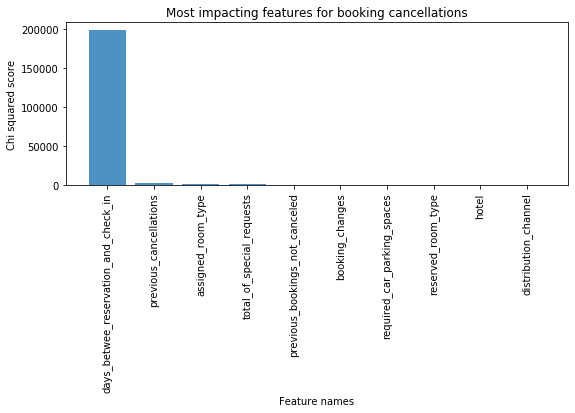

In [15]:
#Feature selection for predicting booking cancellations and profitable bookings
#using SelectKBest from sklearn and chi-squared statistical test as score function

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


#Using "is_canceled" column as target variable for predicting cancellations.
Y = bookings_data['is_canceled']
X = bookings_data

#Dropping unnecessary columns from our X
X = X.drop(['is_canceled'], axis = 1)
X = X.drop(['reservation_status'], axis = 1)
X = X.drop(['reservation_status_date'], axis = 1)

#Finding if there are any missing values in our X
X.isnull().sum()

#Filling the missing values found
X["children"].fillna(0, inplace = True) 

#Encoding all the other categorical features
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
X['hotel'] = le.fit_transform(X['hotel'])
X['arrival_date_month'] = le.fit_transform(X['arrival_date_month'])
X['meal_booked'] = le.fit_transform(X['meal_booked'])
X['market_segment'] = le.fit_transform(X['market_segment'])
X['distribution_channel'] = le.fit_transform(X['distribution_channel'])
X['reserved_room_type'] = le.fit_transform(X['reserved_room_type'])
X['assigned_room_type'] = le.fit_transform(X['assigned_room_type'])
X[X < 0] = 0
#print(X)

#Now Finding the top features for predicing our Y
bestfeatures = SelectKBest(score_func=chi2, k="all")
fit = bestfeatures.fit(X,Y)
fit_scores = pd.DataFrame(fit.scores_)
column_names = pd.DataFrame(X.columns)
feature_scores = pd.concat([column_names,fit_scores],axis=1)
feature_scores.columns = ['column','score']
impacting_features = feature_scores.nlargest(10, 'score')
print(impacting_features)

#Plotting the graph to demonstrate the impact of features on booking cancelaltions
plt.subplots(figsize=(9,3))
plt.title("Most impacting features for booking cancellations")
plt.xlabel("Feature names")
plt.ylabel("Chi squared score")
plt.bar(impacting_features['column'], impacting_features['score'], align='center', alpha=0.8)
plt.xticks(fontsize=10, rotation=90)

<BarContainer object of 445 artists>

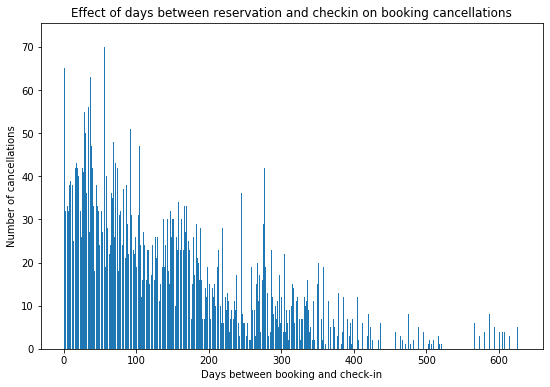

In [17]:
#Now plotting a graph to explain the relation between the booking cancellations and the most dominant feature afftecting 
#booking cancellations i.e: "days_between_reservation_and_check_in".

#graph between "is_canceled" and "days_between_reservation_and_check_in"
gap_between_bookings_and_checkin_counter = Counter(cancelled_bookings['days_betwee_reservation_and_check_in'])
#print(gap_between_bookings_and_checkin_counter)

#Plotting the graph to demonstrate the impact of "days_between_reservation_and_check_in" on booking cancelaltions
plt.subplots(figsize=(9,6))
plt.title("Effect of days between reservation and checkin on booking cancellations")
plt.xlabel("Days between booking and check-in")
plt.ylabel("Number of cancellations")
plt.bar(gap_between_bookings_and_checkin_counter.keys(), gap_between_bookings_and_checkin_counter.values())

{1: 77, 4: 3, 0: 15, 3: 1, 6: 1, 11: 1, 2: 1}


<BarContainer object of 7 artists>

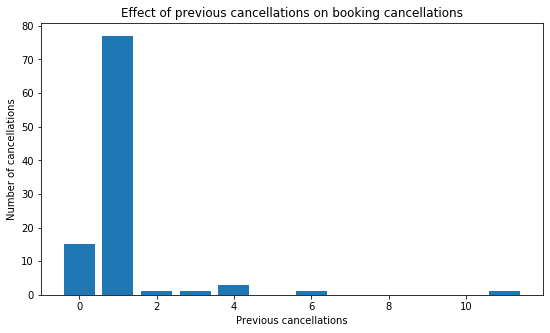

In [19]:
#Now plotting a graph to explain the relation between the booking cancellations and "previous cancellations"
#Also the guest have to be a repeated guest for this analysis.
repeated_guest_cancelled_bookings = cancelled_bookings[cancelled_bookings.is_repeated_guest == 1]
previous_cancellations_counter = Counter(repeated_guest_cancelled_bookings['previous_cancellations'])
previous_cancellations_counter = dict(previous_cancellations_counter)
print(previous_cancellations_counter)

plt.subplots(figsize=(9,5))
plt.title("Effect of previous cancellations on booking cancellations")
plt.xlabel("Previous cancellations")
plt.ylabel("Number of cancellations")
plt.bar(previous_cancellations_counter.keys(), previous_cancellations_counter.values())
#plt.locator_params(axis='x', nbins=10)

In [13]:
#Now plotting a graph to explain the relation between the booking cancellations and "previous cancellations"
#Also the guest have to be a repeated guest for this analysis.

#repeated_guest_cancelled_bookings = cancelled_bookings[cancelled_bookings.is_repeated_guest == 1]
#previous_not_cancellations_counter = Counter(repeated_guest_cancelled_bookings['previous_bookings_not_canceled']).most_common(10)
#previous_not_cancellations_counter = dict(previous_not_cancellations_counter)
#print(previous_not_cancellations_counter)

#plt.subplots(figsize=(12,6))
#plt.title("Effect of previous bookings not cancelled on bookings cancellation")
#plt.xlabel("Previous bookings not cancelled")
#plt.ylabel("Number of cancellations")
#plt.bar(previous_not_cancellations_counter.keys(), previous_not_cancellations_counter.values())
#plt.locator_params(axis='x', nbins=12)

<BarContainer object of 11 artists>

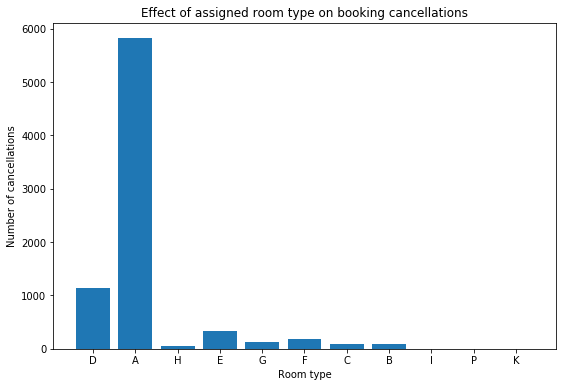

In [20]:
#Now plotting a graph to explain the relation between the booking cancellations and "assigned_room_type"
assigned_room_type_cancellations_counter = Counter(cancelled_bookings['assigned_room_type'])

#Plotting the graph to demonstrate the impact of "assigned_room_type" on booking cancelaltions
plt.subplots(figsize=(9,6))
plt.title("Effect of assigned room type on booking cancellations")
plt.xlabel("Room type")
plt.ylabel("Number of cancellations")
plt.bar(assigned_room_type_cancellations_counter.keys(), assigned_room_type_cancellations_counter.values())

                                  column          score
3   days_betwee_reservation_and_check_in  172784.448427
9                   stays_in_week_nights   28458.566368
8                stays_in_weekend_nights   20597.034596
21                       booking_changes   10430.590884
22           required_car_parking_spaces    5980.527217
19                    reserved_room_type    3484.431749
18        previous_bookings_not_canceled    3470.720882
20                    assigned_room_type    2883.920755
17                previous_cancellations    2600.406193
1                                  hotel    1945.906173


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

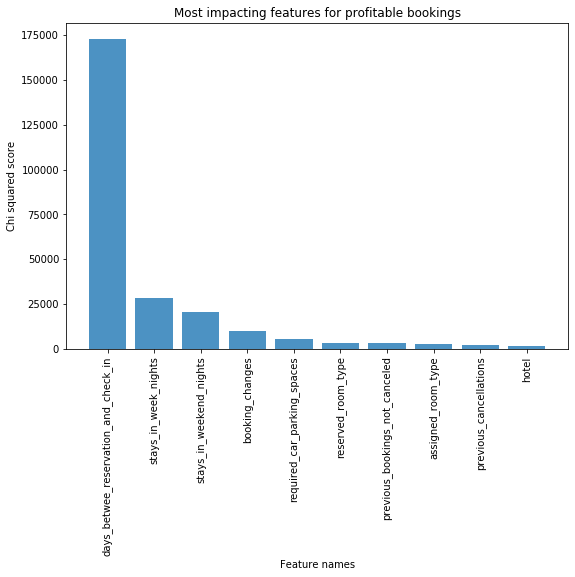

In [22]:
#To find the most profitable booking, I am assuming that higher the "total cost" of a booking, more profit Resort Holyday is making from a particular booking.
#Hence we need to find the features driving the cost of a booking.

#Using "total_cost" column as target variable for predicting profitable bookings.
Y = bookings_data['total_cost']
X = bookings_data

#Dropping unnecessary columns from our X
X = X.drop(['total_cost'], axis = 1)
X = X.drop(['reservation_status'], axis = 1)
X = X.drop(['reservation_status_date'], axis = 1)

#Finding if there are any missing values in our X
X.isnull().sum()

#Filling the missing values found
X["children"].fillna(0, inplace = True) 

#Encoding all the other categorical features
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
X['hotel'] = le.fit_transform(X['hotel'])
X['arrival_date_month'] = le.fit_transform(X['arrival_date_month'])
X['meal_booked'] = le.fit_transform(X['meal_booked'])
X['market_segment'] = le.fit_transform(X['market_segment'])
X['distribution_channel'] = le.fit_transform(X['distribution_channel'])
X['reserved_room_type'] = le.fit_transform(X['reserved_room_type'])
X['assigned_room_type'] = le.fit_transform(X['assigned_room_type'])
X[X < 0] = 0

#Now Finding the top features for predicing our Y
bestfeatures = SelectKBest(score_func=chi2, k="all")
fit = bestfeatures.fit(X,Y)
fit_scores = pd.DataFrame(fit.scores_)
column_names = pd.DataFrame(X.columns)
feature_scores = pd.concat([column_names,fit_scores],axis=1)
feature_scores.columns = ['column','score']
impacting_features = feature_scores.nlargest(10, 'score')
print(impacting_features)

#Plotting the graph to demonstrate the impact of features on most profitable bookings
plt.subplots(figsize=(9,6))
plt.title("Most impacting features for profitable bookings")
plt.xlabel("Feature names")
plt.ylabel("Chi squared score")
plt.bar(impacting_features['column'], impacting_features['score'], align='center', alpha=0.8)
plt.xticks(fontsize=10, rotation=90)

<BarContainer object of 23 artists>

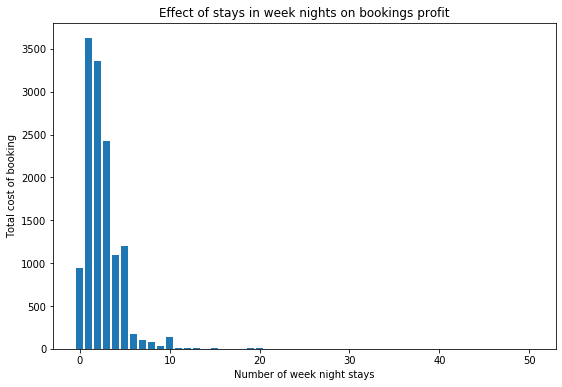

In [21]:
#Now plotting a graph to explain the relation between the profitable bookings and "stays_in_week_nights"
#First we need to find the booking which are not cancelled. Again assuming that profitable means higher the total cost of booking.
bookings = bookings_data[bookings_data.is_canceled == 0]

weeknights_bookings = Counter(bookings['stays_in_week_nights'])

#Plotting the graph to demonstrate the impact of "stays_in_week_nights" on profit
plt.subplots(figsize=(9,6))
plt.title("Effect of stays in week nights on bookings profit")
plt.xlabel("Number of week night stays")
plt.ylabel("Total cost of booking")
plt.bar(weeknights_bookings.keys(), weeknights_bookings.values())

<BarContainer object of 30 artists>

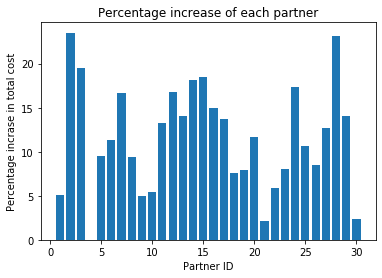

In [19]:
#To find the most profittable partners we need to find the partners with bookings of high total cost after cancellations.
bookings = bookings_data[bookings_data.is_canceled == 0]

#group partners by partnerID and summing their total_cost
partners = bookings.groupby('partner_ID')['total_cost'].sum().to_dict()

#Sorting the partners according to their profit
import operator
sorted_partners = sorted(partners.items(), key=operator.itemgetter(1))
#print(sorted_partners)

#Fidning the percentage increase of each partner with respect to the partner with lowest profit
increased_profits = []
partnersID = []
x = min(partners.values())              #Lowest profit partner. i.e: partnerID = 4
for index in sorted_partners:
    y = index[1] - x
    increased_profits.append((y/x)*100)
    partnersID.append(index[0])
    #print(index[0], index[1])

plt.title("Percentage increase of each partner")
plt.xlabel("Partner ID")
plt.ylabel("Percentage incrase in total cost")
plt.bar(partnersID, increased_profits)
#Hence the most profitable partners are 28 and 2.

In [24]:
#Finding the maximum amount of refound
#seperating data for each partner

reservation_status_counter = Counter(bookings_data['reservation_status'])
print(reservation_status_counter)

partners = bookings_data.groupby(bookings_data['partner_ID'])
partners = pd.DataFrame(list(partners))


Counter({'Check-Out': 13234, 'Canceled': 7627, 'No-Show': 205})
